In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [33]:
X = 8 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2*np.random.randn(100,1) #This is my quadratic equation y=0. X^2 + 1.5*X + 2+Outliers

Text(0, 0.5, 'y dataset')

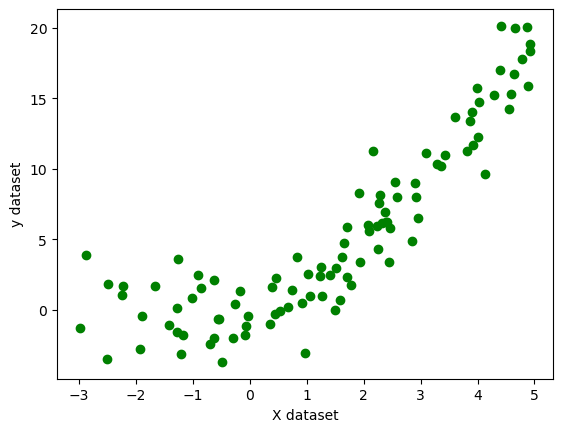

In [34]:
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lr.predict(X_test))
print(score)

0.778467828252908


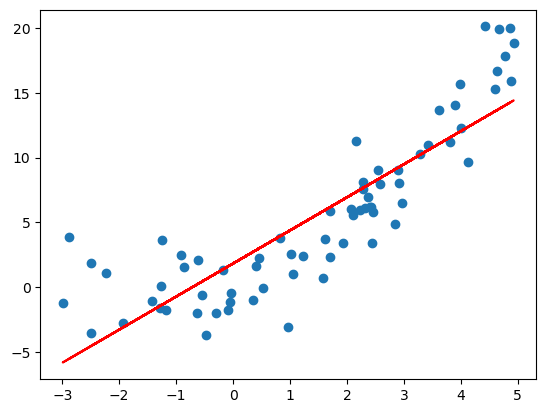

In [40]:
# Plot Best Fit Line
plt.plot(X_train, lr.predict(X_train), color='r')
plt.scatter(X_train, y_train)

In [41]:
 # Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

In [42]:
x_poly = poly.fit_transform(X_train)

In [43]:
poly.fit(x_poly, y_train)

PolynomialFeatures(degree=4)

In [44]:
line2 = LinearRegression()
line2.fit(x_poly, y_train)

LinearRegression()

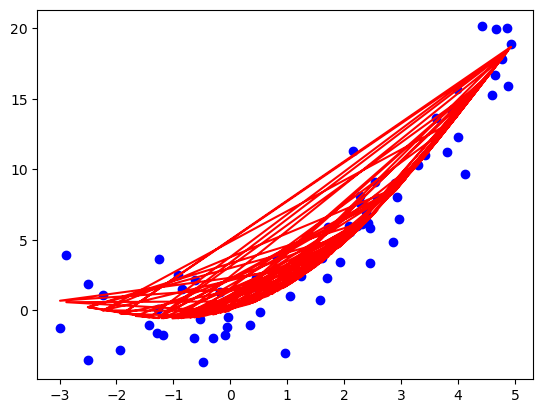

In [45]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line2.predict(poly.fit_transform(X)),
         color='red')

In [46]:
def polynomial_regression(degree):
    

    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    X_new_poly = poly.transform(X_new)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    reg = LinearRegression()
    poly_reg = Pipeline([
        ('poly_features', poly_features),
        ('linear regression', reg)
    ])

    poly_reg.fit(X_train, y_train)
    y_pred = poly_reg.predict(X_new)
    # plotting prediction line

    plt.plot(X_new, y_pred, 'r', label="degree" + str(degree), linewidth=2)
    plt.plot(X_train, y_train, 'b.', linewidth=2)
    plt.plot(X_test, y_test, 'g.', linewidth=2)
    plt.legend("upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    
    plt.show()

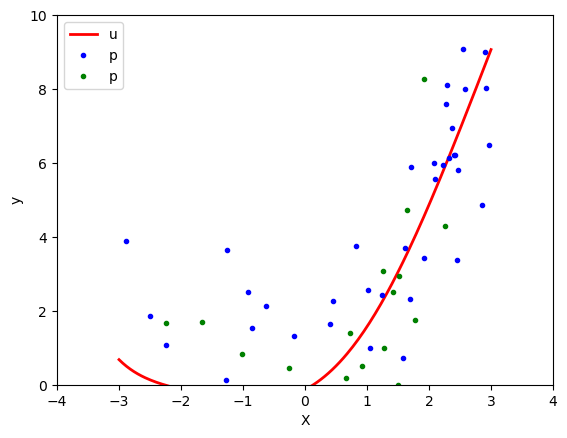

In [51]:
polynomial_regression(6)